# Eager Execution

https://www.tensorflow.org/programmers_guide/eager

In [1]:
!date
!hostname
!pip install --ignore-installed --upgrade tensorflow
!python -m pip install --upgrade pip

Thu May 17 19:43:00 UTC 2018
nbserver
  Using cached https://files.pythonhosted.org/packages/6d/dc/464f59597a5a8282585238e6e3a7bb3770c3c1f1dc8ee72bd5be257178ec/tensorflow-1.8.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/91/cc9805f1ff7b49f620136b3a7ca26f6a1be2ed424606804b0fbcf499f712/astor-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/ff/f118147fd7a8d2d441d15e1cb7fefb2c1981586e24ef3a7d8a742535b085/grpcio-1.12.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7b/61/11b05cc37ccdaabad89f04dbdc2a02905cf6de6f9b05816dba843beed328/numpy-1.14.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5b/c3/9b947e301e19bea75dc8c1fd3710eed5d2b31aa13ae13d5e38e891f784cc/protobuf-3.5.2.post1-c

# TensorFlow (v1.8)
![TF structure](images/tf_structure.png)

### What is TensorFlow?
* a computational framework for building machine learning models.
    * a graph protocol buffer
    * a runtime that executes the (distributed) graph
* provides a variety of different toolkits that allow you to construct models at your preferred level of abstraction. 
* use lower-level APIs to build models by defining a series of mathematical operations. 
* use higher-level APIs (like tf.estimator) to specify predefined architectures, such as linear regressors or neural networks.

### Computational Graph

![graph flow](images/tensors_flowing.gif)

# TensorFlow 1.8 in Eager Execution mode

In [2]:
import tensorflow as tf

print(tf.__version__)

tf.enable_eager_execution()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


In [3]:
print(tf.executing_eagerly())              # => True

x = [[2.]]
m = tf.matmul(x, x)
print("Hello, {}".format(m))        # => "Hello, [[4.]]

True
Hello, [[4.]]


## Computational Graph Execution

For building and training graph-constructed models, the Python program first builds a graph representing the computation, then invokes ```Session.run``` to send the graph for execution on the C++-based runtime. This provides:

* Automatic differentiation using static autodiff.
* Simple deployment to a platform independent server.
* Graph-based optimizations (common subexpression elimination, constant-folding, etc.).
* Compilation and kernel fusion.
* Automatic distribution and replication (placing nodes on the distributed system).

## Eager Execution

Enabling eager execution changes how TeensorFlow operations behave - now they immediately evaluate and return their values to Python.

* Due to numerical values available instantly after each cell run - we can use ```print()``` statements to print out the results or intermediate values for debugging purposes.
* Evaluating, printing, and checking tensor values does not break the flow for computing gradients.
* ```tf.Tensor``` objects reference concrete numeric values instead of symbolic handles to nodes in a computational graph during eager execution mode.
* Eager execution works nicely with NumPy. NumPy operations accept ```tf.Tensor``` arguments. TensorFlow *math operations* convert Python objects and NumPy arrays to ```tf.Tensor``` objects. 
* Note: The ```tf.Tensor.numpy``` method returns the object's value as a NumPy ```ndarray```.

In [4]:
a = tf.constant([[1, 2],
                 [3, 4]])

print(a)
# tf.Tensor(
# [[1 2]
#  [3 4]], shape=(2, 2), dtype=int32)

# Broadcasting support
b = tf.add(a, 1)
print(b)
# tf.Tensor(
# [[2 3]
#  [4 5]], shape=(2, 2), dtype=int32)

print(a * b)
# tf.Tensor(
# [[ 2  6]
#  [12 20]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [5]:
import numpy as np

c = np.multiply(a, b)
print(c)
# [[ 2  6]
#  [12 20]]

print(a.numpy())
# [[1 2]
#  [3 4]]

[[ 2  6]
 [12 20]]
[[1 2]
 [3 4]]


In [6]:
# Matrix-Matrix multiplication or GEMM or tf.matmul
# https://www.tensorflow.org/api_docs/python/tf/matmul

# [[1, 2, 3],
#  [4, 5, 6]]
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])

# [[ 7,  8],
#  [ 9, 10],
#  [11, 12]]
b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])

# `a` * `b`
#
# [[1, 2, 3],    [[ 7,  8],     [[ 58,  64],
#  [4, 5, 6]] *   [ 9, 10],  =   [139, 154]]
#                 [11, 12]]
c = tf.matmul(a, b)
print(a, b, c)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) tf.Tensor(
[[ 58  64]
 [139 154]], shape=(2, 2), dtype=int32)


## Eager Training

### Automatic Differentiation

In [7]:
import tensorflow.contrib.eager as tfe

In [8]:
w = tfe.Variable([[1.0]])
with tfe.GradientTape() as tape:
    loss = w * w
    
grad = tape.gradient(loss, [w])
print(grad)

[<tf.Tensor: id=41, shape=(1, 1), dtype=float32, numpy=array([[2.]], dtype=float32)>]


In [9]:
w = tfe.Variable([[0.000000000000000000000000000]])

with tfe.GradientTape() as tape:
    loss = tf.nn.relu(w)
    
grad = tape.gradient(loss, [w])
print(grad)

[<tf.Tensor: id=55, shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>]


### Toy example (linear regression) with automatic differentiation

In [10]:
# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES = 1000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

def prediction(input, weight, bias):
    return input * weight + bias

# A loss function using mean-squared error
def loss(weights, biases):
    error = prediction(training_inputs, weights, biases) - training_outputs
    return tf.reduce_mean(tf.square(error))

# Return the derivative of loss with respect to weight and bias
def grad(weights, biases):
    with tfe.GradientTape() as tape:
        loss_value = loss(weights, biases)
    return tape.gradient(loss_value, [weights, biases])

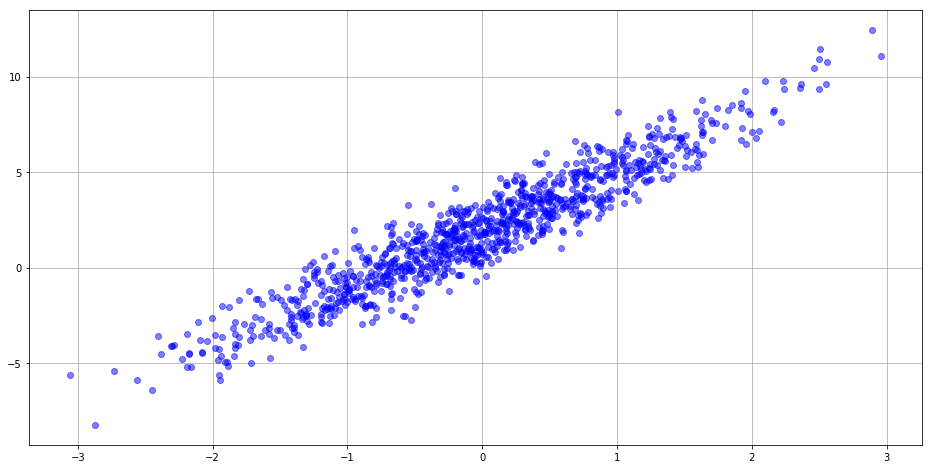

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 8))
plt.grid(True)
plt.plot(training_inputs, training_outputs, 'ob', alpha=0.5);

In [12]:
training_steps = 200
learning_rate = 0.01

# Start with arbirtaty values for W and B on the same batch of data
W = tfe.Variable(5.)
B = tfe.Variable(10.)

print("Initial loss: {:.3f}".format(loss(W, B)))

for i in range(training_steps):
    dW, dB = grad(W, B)
    W.assign_sub(dW * learning_rate)
    B.assign_sub(dB * learning_rate)
    if i%20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss(W, B)))
        
print("Final loss: {:.3f}".format(loss(W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))

Initial loss: 67.834
Loss at step 000: 65.236
Loss at step 020: 30.096
Loss at step 040: 14.203
Loss at step 060: 7.005
Loss at step 080: 3.741
Loss at step 100: 2.260
Loss at step 120: 1.586
Loss at step 140: 1.279
Loss at step 160: 1.140
Loss at step 180: 1.076
Final loss: 1.048
W = 3.0942606925964355, B = 2.129277229309082


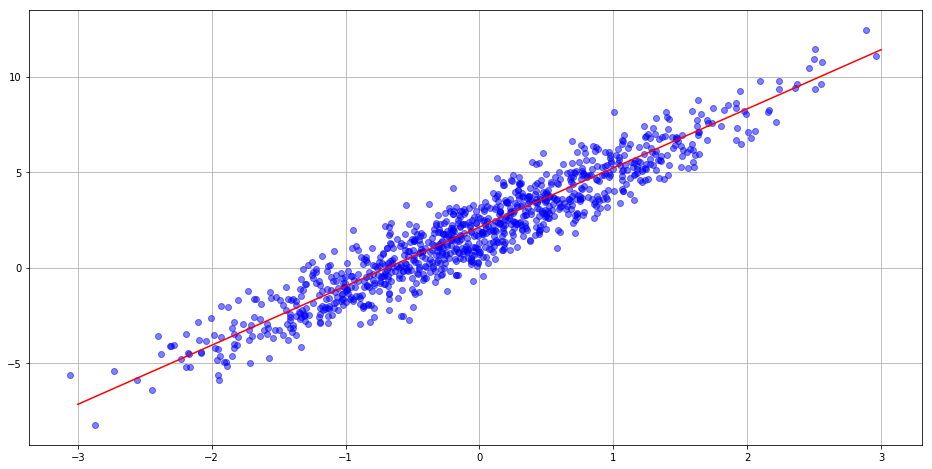

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.grid(True)
plt.plot(training_inputs, training_outputs, 'ob', alpha=0.5);

x = [-3., 0., 3.]
y = [a * W.numpy() + B.numpy() for a in x]

plt.plot(x, y, 'r');

To look into Eager Execution for MNIST dataset:
https://github.com/tensorflow/models/blob/master/official/mnist/mnist_eager.py
or next notebook

Read more for advanced topics: Dynamic models, additional functions to compute gradients; Custom gradients